Fraud Detection

**Identity Dataset:**

1.   **id_01 - id11:** numerical features such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page.
2.   id_12 - id_38: categorical features
3. Device Type: categorical features
4. Device Info: categorical features

**Transaction Dataset:**

1. card1 - card6: payment card info such as card type, card category, issue bank, country.
2. addr: addres
3. M1 - M9: match, such as names on card and address.
4. ProductCD: product code
5. P_ and R_ email domain: purchaser and recipient email domain.
6. C1 - C14: counting, such as how many addresses are found to be associated with a payment.
7. D1 - D15: timedelta, such as days between previes transactions.






In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Acquisition

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df_id=pd.read_csv('/content/drive/My Drive/Make Money with ML/3. Cybersecurity/train_identity.csv')
df_tr=pd.read_csv('/content/drive/My Drive/Make Money with ML/3. Cybersecurity/train_transaction.csv')

In [4]:
print('Identity: ',df_id.shape)
print('Transaction: ',df_tr.shape)

Identity:  (144233, 41)
Transaction:  (590540, 394)


In [0]:
df_tr_merge=pd.merge(df_tr,df_id,how='left',on='TransactionID')

In [6]:
df_tr_merge.shape

(590540, 434)

# Data Analysis


##Merged Dataset

In [7]:
df_tr_merge.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


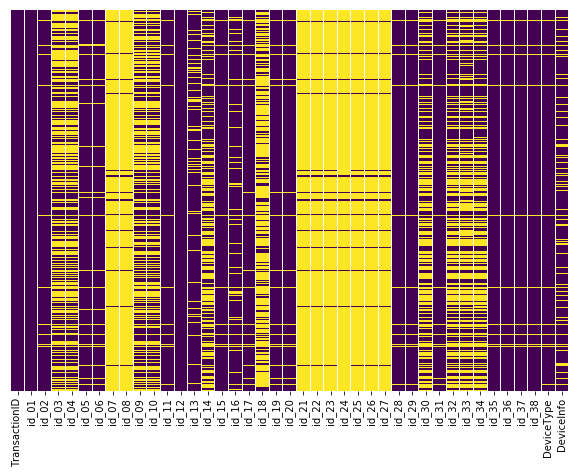

In [8]:
#Nulls visualization for Identity Dataset
plt.figure(figsize=(10,7))
sns.heatmap(df_id.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
#Percentage of missing values up to 30%
missing=pd.Series(df_tr_merge.isna().sum()/len(df_tr_merge))
missing=missing[missing>.3]

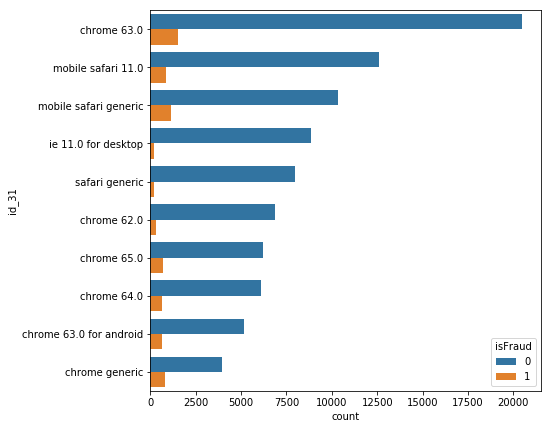

In [10]:
#Top 10 - Browser version
df_id['id_31'].value_counts()
plt.figure(figsize=(7,7))
sns.countplot(y='id_31',hue='isFraud',data=df_tr_merge,order=df_tr_merge.id_31.value_counts().iloc[:10].index)

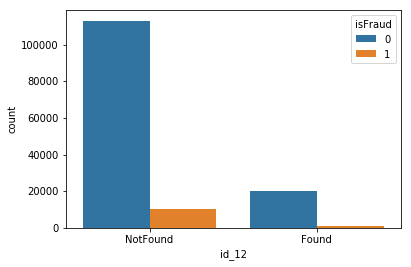

In [11]:
#id_12: categorical feature
sns.countplot(x='id_12',hue='isFraud',data=df_tr_merge)

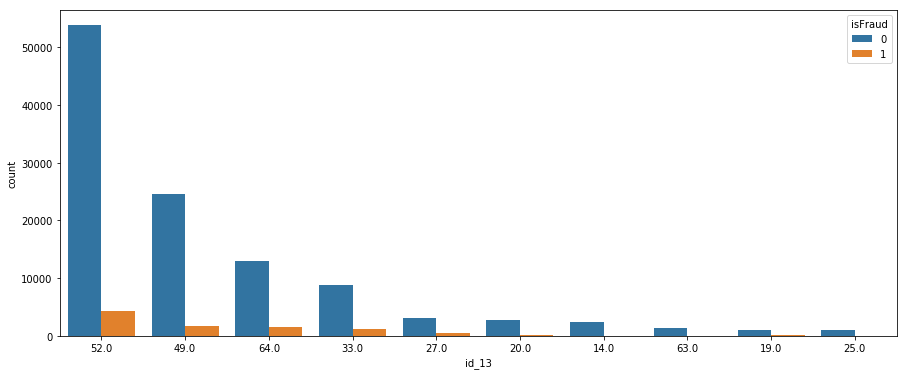

In [12]:
#id_13: Categorical feature
plt.figure(figsize=(15,6))
sns.countplot(x='id_13',hue='isFraud',data=df_tr_merge, order=df_tr_merge.id_13.value_counts().iloc[:10].index)

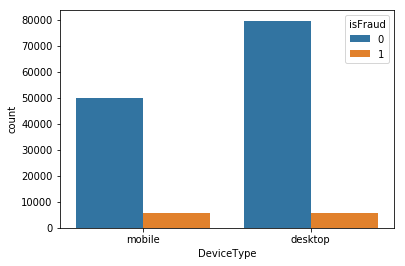

In [13]:
#Mobile or Desktop
sns.countplot(x='DeviceType',hue='isFraud',data=df_tr_merge)

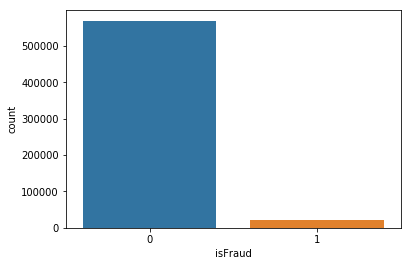

In [14]:
#Fraud visualization
sns.countplot(x='isFraud',data=df_tr_merge)

In [15]:
df_tr_merge['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [16]:
#Type of card
df_tr_merge['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

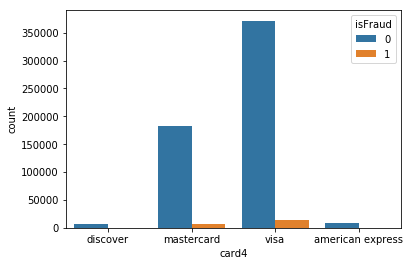

In [17]:
sns.countplot(x='card4',data=df_tr_merge,hue=df_tr['isFraud'])

In [18]:
#How many products for each code
df_tr_merge['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

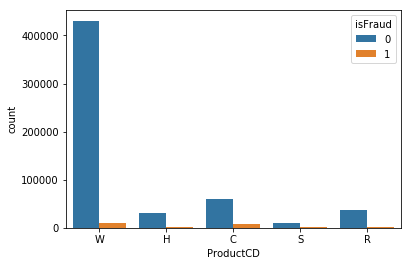

In [19]:
sns.countplot(x='ProductCD',data=df_tr,hue=df_tr['isFraud'])

In [20]:
#M6 column
df_tr_merge['M6'].value_counts()

F    227856
T    193324
Name: M6, dtype: int64

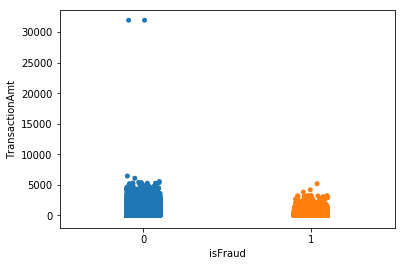

In [21]:
#Amount for each transaction
sns.stripplot(x='isFraud',y='TransactionAmt', data=df_tr,jitter=True)

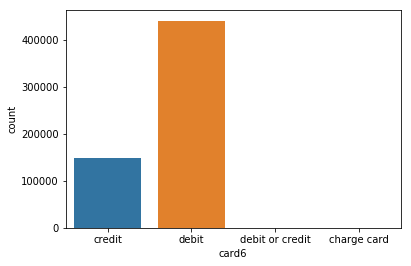

In [22]:
#Type of cards
sns.countplot(x='card6',data=df_tr)

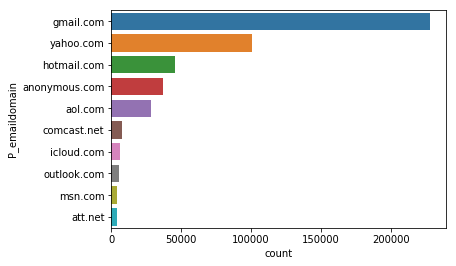

In [23]:
#Top  10 of Email domains
sns.countplot(y='P_emaildomain',data=df_tr, order=df_tr.P_emaildomain.value_counts().iloc[:10].index)

In [24]:
#59 unique email domains
df_tr['P_emaildomain'].nunique()

59

##Cleaning

In [0]:
#Cleaning (drop columns that have 60% of NaN values)
df_tr_merge.drop(columns=missing.index, inplace=True)


In [26]:
df_tr_merge.shape

(590540, 202)

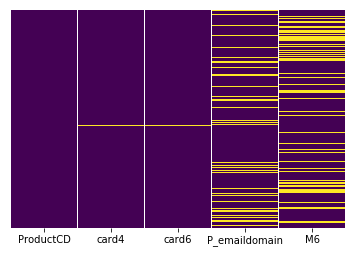

In [27]:
#df_tr_merge.select_dtypes(include=['object'])
#Missing values for categorical features
sns.heatmap(df_tr_merge.select_dtypes(include=['object']).isna(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
#Fill missing values for M6 with unknown & drop emaildomain column
df_tr_merge['M6'].fillna('Unknown',inplace=True)
df_tr_merge.drop(columns='P_emaildomain',inplace=True)

In [0]:
#Drop rows for missing values
df_tr_merge.dropna(inplace=True)

In [0]:
#Convert categorical features
product = pd.get_dummies(df_tr_merge['ProductCD'])
card4 = pd.get_dummies(df_tr_merge['card4'])
card6 = pd.get_dummies(df_tr_merge['card6'])
m6 = pd.get_dummies(df_tr_merge['M6'])

In [0]:
df_tr_merge.drop(['ProductCD','card4','card6','M6'],inplace=True,axis=1)


In [32]:
df_tr_merge.shape

(346912, 197)

In [0]:
#Concat new features
df_tr_merge = pd.concat([product,card4,card6,m6,df_tr_merge],axis=1)

In [34]:
df_tr_merge.shape

(346912, 211)

In [0]:
X=df_tr_merge.drop('isFraud',axis=1)
y=df_tr_merge['isFraud']

#Model Building

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

##Training and Predicting

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

##Evaluation

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    102032
           1       0.13      0.00      0.01      2042

    accuracy                           0.98    104074
   macro avg       0.56      0.50      0.50    104074
weighted avg       0.96      0.98      0.97    104074



In [41]:
print(confusion_matrix(y_test,predictions))

[[101974     58]
 [  2033      9]]
